### Feature Engineering Techniques
1. Encoding Categorical Variables
   - One-Hot Encoding
   - Label Encoding
   - Binary Encoding
2. Feature Splitting - Discussed in LAB 3 with SOLD_YEAR
4. Feature Scaling
   - Min-Max Scale
   - Standard Scale
5. Class Balancing - SMOTE

In [1]:
### Import necessary libraries
import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns # Higher-level, more aesthetically pleasing plots.
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.

In [2]:
# Load the dataset
df = pd.read_csv('data/house-price-perth.csv')
df.shape

(33656, 19)

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


In [4]:
# Convert prices to thousands for better readability
df['PRICE'] = (df['PRICE']/1000).astype(int)
df['NEAREST_SCH_DIST'] = df['NEAREST_SCH_DIST'].round(2)

In [5]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.83,NaN
1,1 Addis Way,Wandi,365,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.52,129.0
2,1 Ainsley Court,Camillo,287,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.65,113.0
3,1 Albert Street,Bellevue,255,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.57,NaN
4,1 Aman Place,Lockridge,325,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.51,NaN


In [6]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')
Categorical columns: Index(['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH'], dtype='object')


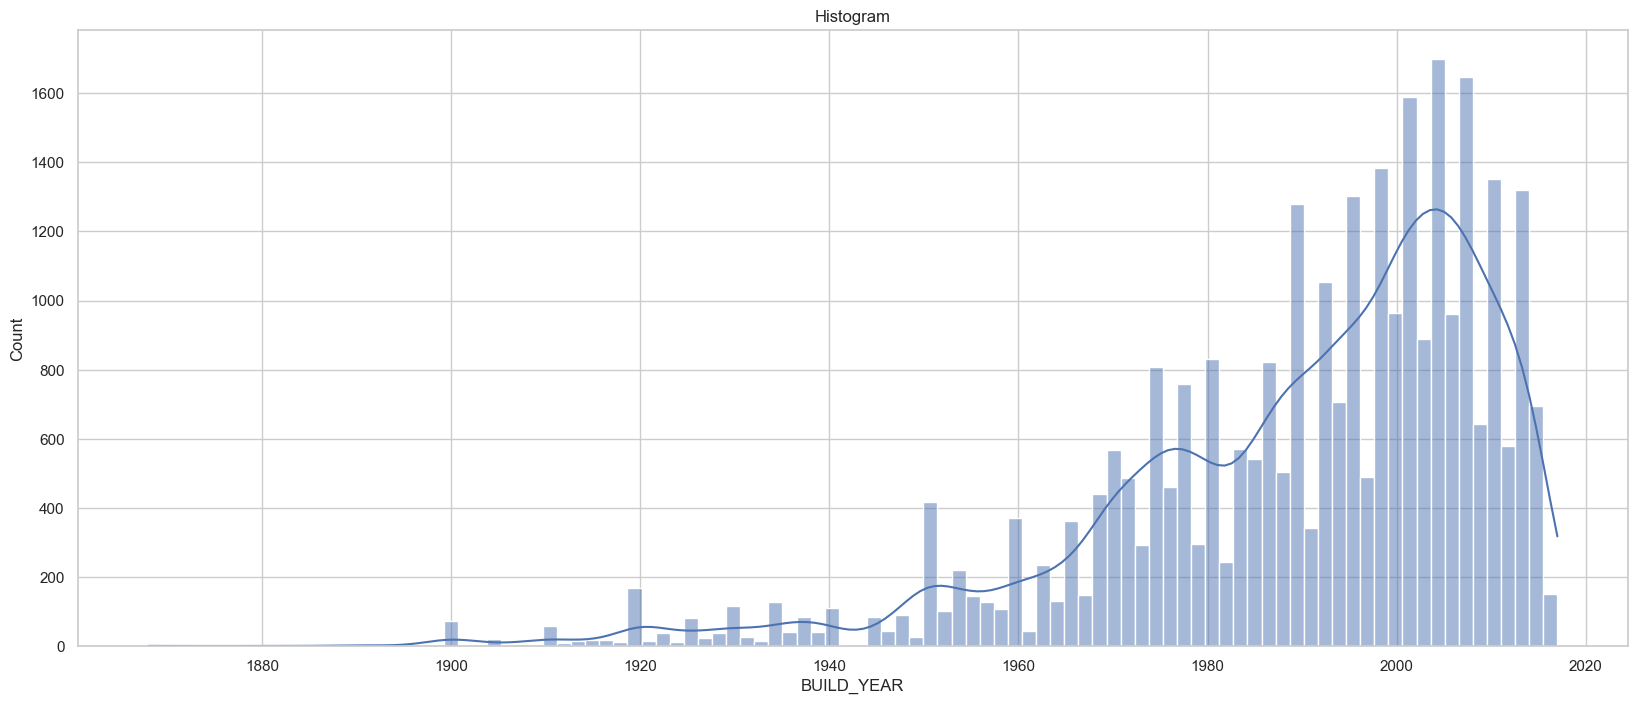

In [7]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))

sns.histplot(df['BUILD_YEAR'], bins=100, kde=True)
plt.title("Histogram")
plt.show()

In [8]:
# Categorizes build year
df['BUILD_YEAR_CAT'] = pd.cut(
    df['BUILD_YEAR'], 
    bins=[1850, 1875, 1900, 1925, 1950, 1975, 2000, 2025], 
    labels=['1850-1874', '1874-1899', '1900-1924', '1925-1949', '1950-1974', '1975-1999', '2000-2025']
)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ADDRESS           33656 non-null  object  
 1   SUBURB            33656 non-null  object  
 2   PRICE             33656 non-null  int64   
 3   BEDROOMS          33656 non-null  int64   
 4   BATHROOMS         33656 non-null  int64   
 5   GARAGE            31178 non-null  float64 
 6   LAND_AREA         33656 non-null  int64   
 7   FLOOR_AREA        33656 non-null  int64   
 8   BUILD_YEAR        30501 non-null  float64 
 9   CBD_DIST          33656 non-null  int64   
 10  NEAREST_STN       33656 non-null  object  
 11  NEAREST_STN_DIST  33656 non-null  int64   
 12  DATE_SOLD         33656 non-null  object  
 13  POSTCODE          33656 non-null  int64   
 14  LATITUDE          33656 non-null  float64 
 15  LONGITUDE         33656 non-null  float64 
 16  NEAREST_SCH       3365

In [10]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,BUILD_YEAR_CAT
0,1 Acorn Place,South Lake,565,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.83,NaN,2000-2025
1,1 Addis Way,Wandi,365,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.52,129.0,2000-2025
2,1 Ainsley Court,Camillo,287,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.65,113.0,1975-1999
3,1 Albert Street,Bellevue,255,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.57,NaN,1950-1974
4,1 Aman Place,Lockridge,325,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.51,NaN,1975-1999


#### Label Encoding
- Simple and memory-efficient.
- Implies an ordinal relationship between categories (e.g., 2 > 0). which can mislead linear models.
- Works well with tree-based algorithms (e.g., decision trees, random forests).

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['BUILD_YEAR_CAT_LB'] = le.fit_transform(df['BUILD_YEAR_CAT'])

In [12]:
df[df['BUILD_YEAR'] < 1900].head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,BUILD_YEAR_CAT,BUILD_YEAR_CAT_LB
1130,10 Hubert Street,Guildford,675,3,1,NaN,372,138,1897.0,12300,East Guildford Station,704,07-2015\r,6055,-31.900490,115.974510,GUILDFORD GRAMMAR SCHOOL,1.00,52.0,1874-1899,1
4937,132 Swan Street,Guildford,2250,4,2,4.0,3542,232,1890.0,12200,Guildford Station,523,11-2013\r,6055,-31.896860,115.970890,GUILDFORD GRAMMAR SCHOOL,1.09,52.0,1874-1899,1
5088,138 Swan Street,Guildford,1235,4,3,2.0,1653,225,1870.0,12200,Guildford Station,453,05-2015\r,6055,-31.896303,115.969594,GUILDFORD GRAMMAR SCHOOL,1.19,52.0,1850-1874,0
10087,1B Knutsford Street,Fremantle,1245,3,2,1.0,532,168,1890.0,14900,Fremantle Station,980,03-2018\r,6160,-32.053745,115.755273,CHRISTIAN BROTHERS' COLLEGE,0.28,49.0,1874-1899,1
11478,205 James Street,Guildford,877,1,1,1.0,365,145,1894.0,11700,Guildford Station,93,11-2015\r,6055,-31.899630,115.966380,GUILDFORD GRAMMAR SCHOOL,1.59,52.0,1874-1899,1


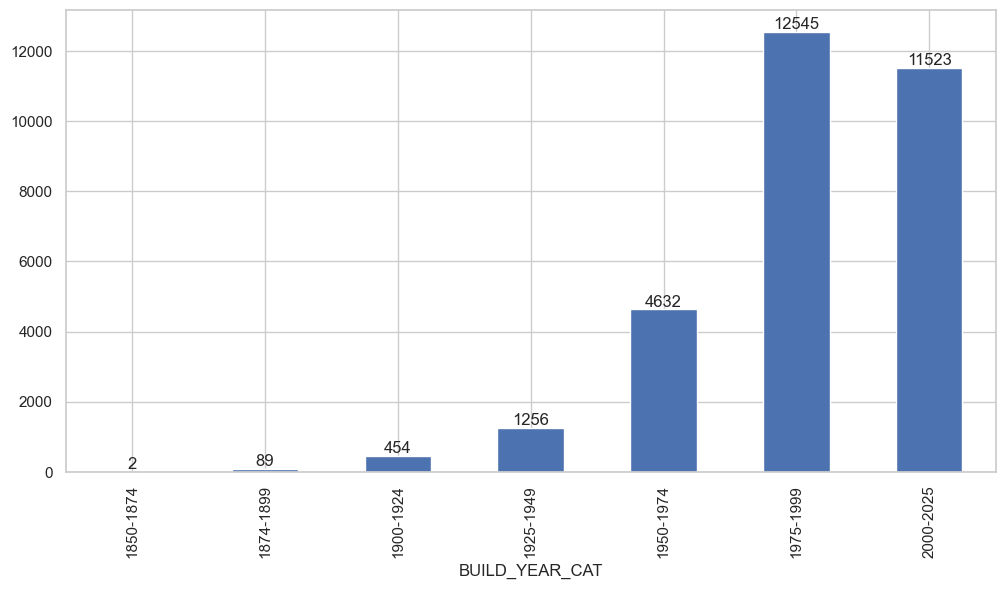

In [13]:
ax = df['BUILD_YEAR_CAT'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

#### One-Hot-Encoding
- Doesn't imply any ordinal relationship.
- Safe for linear models (e.g., logistic regression).
- Increases dimensionality — can be problematic with high-cardinality features (many unique categories).

In [14]:
one_hot_df = pd.get_dummies(df['BUILD_YEAR_CAT'], prefix='BUILD_YEAR_')
df_one_hot = pd.concat([df, one_hot_df], axis=1)
df_one_hot.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,BUILD_YEAR_CAT,BUILD_YEAR_CAT_LB,BUILD_YEAR__1850-1874,BUILD_YEAR__1874-1899,BUILD_YEAR__1900-1924,BUILD_YEAR__1925-1949,BUILD_YEAR__1950-1974,BUILD_YEAR__1975-1999,BUILD_YEAR__2000-2025
0,1 Acorn Place,South Lake,565,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.83,NaN,2000-2025,6,False,False,False,False,False,False,True
1,1 Addis Way,Wandi,365,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.52,129.0,2000-2025,6,False,False,False,False,False,False,True
2,1 Ainsley Court,Camillo,287,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.65,113.0,1975-1999,5,False,False,False,False,False,True,False
3,1 Albert Street,Bellevue,255,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.57,NaN,1950-1974,4,False,False,False,False,True,False,False
4,1 Aman Place,Lockridge,325,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.51,NaN,1975-1999,5,False,False,False,False,False,True,False


#### Binary Encoding
 - Reduces dimensionality compared to One-Hot Encoding.
 - Good for high-cardinality features.
 - Not always suitable for all models.

<pre>STEP 1: Label Encoding. Assign integer IDs to categories

    | BUILD_YEAR_CAT | Label |
    | ---------------| ----- |
    | 1850-1874      | 1     |
    | 1875-1899      | 2     |
    | 1900-1924      | 3     |
    | 1925-1949      | 4     |
    | 1950-1974      | 5     |
    | 1975-1999      | 6     |
    | 2000-2024      | 7     |


STEP 2: Convert labels to binary (in 4 bits because it add extra bit for safety and to 
        avoid collisions or issues with certain models or transformations eventhough 
        log<sub>2</sub>(7) ~ 2.8 --> round up 3)

    | Label | Binary |
    | ------| -------|
    | 1     | 0001    |
    | 2     | 0010    |
    | 3     | 0011    |
    | 4     | 0100    |
    | 5     | 0101    |
    | 6     | 0110    |
    | 7     | 0111    |

STEP 3: Split binary into columns

    | BUILD_YEAR_CAT | Binary_1 | Binary_2 | Binary_3 | Binary_4 |
    | ---------------| --------- | --------- | --------- | --------- |
    | 1850-1874      | 0         | 0         | 0         | 1         |
    | 1875-1899      | 0         | 0         | 1         | 0         |
    | 1900-1924      | 0         | 0         | 1         | 1         |
    | 1925-1949      | 0         | 1         | 0         | 0         |
    | 1950-1974      | 0         | 1         | 0         | 1         |
    | 1975-1999      | 0         | 1         | 1         | 0         |
    | 2000-2024      | 0         | 1         | 1         | 1         |
</pre>


In [15]:
import category_encoders as ce

# Instantiate and apply the encoder
encoder = ce.BinaryEncoder(cols=['BUILD_YEAR_CAT'])
binary_df = encoder.fit_transform(df['BUILD_YEAR_CAT'])
df_binary = pd.concat([df, binary_df], axis=1)
df_binary.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,BUILD_YEAR_CAT,BUILD_YEAR_CAT_LB,BUILD_YEAR_CAT_0,BUILD_YEAR_CAT_1,BUILD_YEAR_CAT_2,BUILD_YEAR_CAT_3
0,1 Acorn Place,South Lake,565,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.83,NaN,2000-2025,6,0,1,1,1
1,1 Addis Way,Wandi,365,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.52,129.0,2000-2025,6,0,1,1,1
2,1 Ainsley Court,Camillo,287,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.65,113.0,1975-1999,5,0,1,1,0
3,1 Albert Street,Bellevue,255,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.57,NaN,1950-1974,4,0,1,0,1
4,1 Aman Place,Lockridge,325,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.51,NaN,1975-1999,5,0,1,1,0


### Feature Scaling
- Feature scaling is a data preprocessing step used to standardize or normalize the range of independent variables. Since many machine learning algorithms (e.g., gradient descent–based models, k-nearest neighbors, support vector machines) are sensitive to the magnitude of features, scaling ensures that all features contribute equally to the model.

#### Min-Max Scalar
- This method rescales features to a fixed range, usually [0,1] but range can be changed.
- Useful when you need all features within the same bounded range, such as in neural networks or distance-based algorithms (KNN, K-means).

In [16]:
numerical_columns

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [17]:
house_price_numerical_df = df[['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA']].copy()

In [18]:
house_price_numerical_df.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA
0,565,4,2,2.0,600,160
1,365,3,2,2.0,351,139
2,287,3,1,1.0,719,86
3,255,2,1,2.0,651,59
4,325,4,1,2.0,466,131


In [19]:
house_price_numerical_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637.042221,355.833280,51.0,410.0,535.0,760.00,2440.0
BEDROOMS,33656.0,3.659110,0.752038,1.0,3.0,4.0,4.00,10.0
BATHROOMS,33656.0,1.823063,0.587427,1.0,1.0,2.0,2.00,16.0
GARAGE,31178.0,2.199917,1.365225,1.0,2.0,2.0,2.00,99.0
LAND_AREA,33656.0,2740.644016,16693.513215,61.0,503.0,682.0,838.00,999999.0
FLOOR_AREA,33656.0,183.501545,72.102982,1.0,130.0,172.0,222.25,870.0


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to range [0,1]
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaled_data = min_max_scaler.fit_transform(house_price_numerical_df)
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=house_price_numerical_df.columns)

In [21]:
min_max_scaled_df.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA
0,0.215153,0.333333,0.066667,0.010204,0.000539,0.182969
1,0.131436,0.222222,0.066667,0.010204,0.000290,0.158803
2,0.098786,0.222222,0.000000,0.000000,0.000658,0.097814
3,0.085391,0.111111,0.000000,0.010204,0.000590,0.066743
4,0.114692,0.333333,0.000000,0.010204,0.000405,0.149597


In [22]:
min_max_scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,0.245309,0.148947,0.0,0.150272,0.202595,0.296777,1.0
BEDROOMS,33656.0,0.295457,0.083560,0.0,0.222222,0.333333,0.333333,1.0
BATHROOMS,33656.0,0.054871,0.039162,0.0,0.000000,0.066667,0.066667,1.0
GARAGE,31178.0,0.012244,0.013931,0.0,0.010204,0.010204,0.010204,1.0
LAND_AREA,33656.0,0.002680,0.016695,0.0,0.000442,0.000621,0.000777,1.0
FLOOR_AREA,33656.0,0.210013,0.082972,0.0,0.148446,0.196778,0.254603,1.0


#### Standard Scalar (Z-Score scaling)
- This method transforms features to have mean = 0 and standard deviation = 1.
- Useful for algorithms that assume normally distributed data or rely on variance, such as logistic regression, SVM, or PCA.

In [23]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(house_price_numerical_df)
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=house_price_numerical_df.columns)

In [24]:
standard_scaled_df.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA
0,-0.202464,0.453295,0.301212,-0.146437,-0.128234,-0.325949
1,-0.764533,-0.876444,0.301212,-0.146437,-0.143150,-0.617203
2,-0.983740,-0.876444,-1.401153,-0.878929,-0.121105,-1.352274
3,-1.073671,-2.206184,-1.401153,-0.146437,-0.125179,-1.726744
4,-0.876947,0.453295,-1.401153,-0.146437,-0.136261,-0.728157


In [25]:
standard_scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,2.195640e-17,1.000015,-1.646982,-0.638067,-0.286774,0.345554,5.066936
BEDROOMS,33656.0,4.095712e-17,1.000015,-3.535924,-0.876444,0.453295,0.453295,8.431733
BATHROOMS,33656.0,1.134238e-16,1.000015,-1.401153,-1.401153,0.301212,0.301212,24.134323
GARAGE,31178.0,-1.472226e-16,1.000016,-0.878929,-0.146437,-0.146437,-0.146437,70.905260
LAND_AREA,33656.0,1.140044e-17,1.000015,-0.160522,-0.134045,-0.123322,-0.113977,59.740161
FLOOR_AREA,33656.0,1.510030e-16,1.000015,-2.531161,-0.742027,-0.159518,0.537412,9.521224


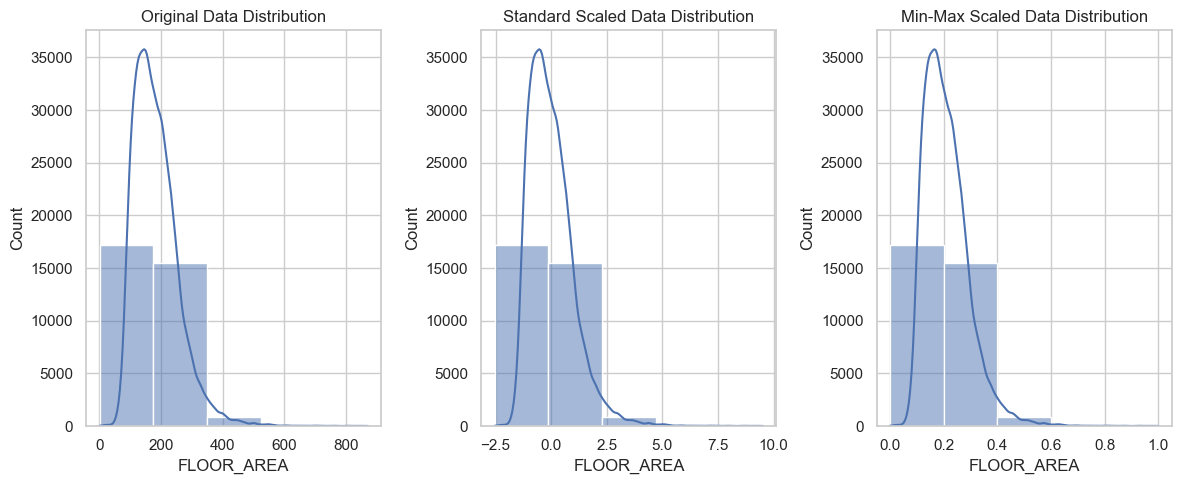

In [26]:
#'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA'

feature = 'FLOOR_AREA'

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Original Data
sns.histplot(house_price_numerical_df[feature], ax=axes[0], kde=True, bins=5)
axes[0].set_title("Original Data Distribution")

# Scaled Data
sns.histplot(standard_scaled_df[feature], ax=axes[1], kde=True, bins=5)
axes[1].set_title("Standard Scaled Data Distribution")

# Scaled Data
sns.histplot(min_max_scaled_df[feature], ax=axes[2], kde=True, bins=5)
axes[2].set_title("Min-Max Scaled Data Distribution")

plt.tight_layout()
plt.show()

# # Pairplot comparison
# sns.pairplot(house_price_numerical_df[['PRICE', 'BEDROOMS', 'BATHROOMS']], diag_kind="kde")
# plt.suptitle("Original Data Pair Plot", y=1.02)
# plt.show()

# sns.pairplot(standard_scaled_df[['PRICE', 'BEDROOMS', 'BATHROOMS']], diag_kind="kde")
# plt.suptitle("Standard Scaled Data Pair Plot", y=1.02)
# plt.show()

Note: 
- Feature scaling methods such as Min-Max Scaling and Standardization adjust the range, mean, and variance of features without altering the underlying shape of their distributions.
- Scaling improves model training stability and comparability across features, but it does not make data more normal or reduce skewness

### SMOTE - Synthetic Minority Oversampling Technique
- SMOTE generates synthetic examples by interpolating between existing minority instances and their nearest neighbors. This helps the model learn decision boundaries more effectively and reduces bias toward the majority class.
- SMOTE improves classification performance in imbalanced datasets, but it may also increase the risk of overfitting and introduce noise if applied without care.

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


# Create an imbalanced dataset (90% class 0, 10% class 1) as house price is a regression problem.
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, 
                           n_redundant=1, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

print("Original class distribution:", Counter(y))

Original class distribution: Counter({np.int64(0): 898, np.int64(1): 102})


In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({np.int64(0): 898, np.int64(1): 898})


C:\Users\irosh\AppData\Local\Temp\ipykernel_9184\402546594.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(synthetic_points[:, 0], synthetic_points[:, 1],


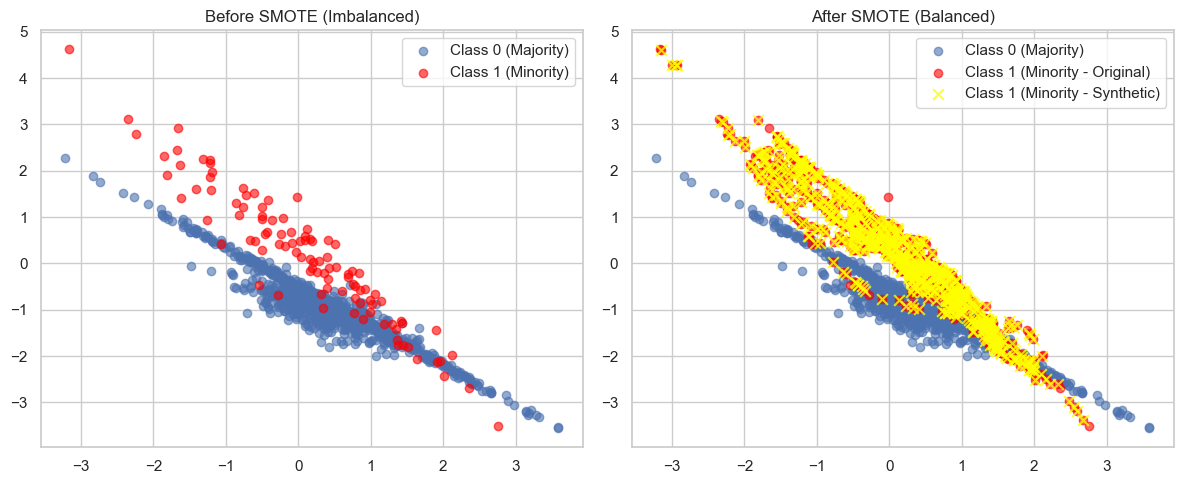

In [ ]:
# Count original class distribution
n_minority_before = np.sum(y == 1)

# Count new class distribution
n_minority_after = np.sum(y_resampled == 1)

# Identify synthetic samples (newly generated minority points)
synthetic_points = X_resampled[-(n_minority_after - n_minority_before):]

# Plot before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0 (Majority)", alpha=0.6)
axes[0].scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1 (Minority)", alpha=0.6, color='red')
axes[0].set_title("Before SMOTE (Imbalanced)")
axes[0].legend()

# Resampled data (highlight synthetic)
axes[1].scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], 
                label="Class 0 (Majority)", alpha=0.6)
axes[1].scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], 
                label="Class 1 (Minority - Original)", alpha=0.6, color='red')
axes[1].scatter(synthetic_points[:, 0], synthetic_points[:, 1], 
                label="Class 1 (Minority - Synthetic)", alpha=0.8, 
                color='yellow', edgecolor='black', marker='x', s=60)
axes[1].set_title("After SMOTE (Balanced)")
axes[1].legend()

plt.tight_layout()
plt.show()

#### Under Sampling Techniques - Reference
- Random Undersampling (RUS)
- Edited Nearest Neighbors (ENN)
- Condensed Nearest Neighbor (CNN)

[Step-Factor Resampling (SFR)](https://www.researchgate.net/profile/Dwiza-Riana/publication/343048238_Detecting_the_Width_of_Pap_Smear_Cytoplasm_Image_Based_on_GLCM_Feature/links/60587b21458515e834606c74/Detecting-the-Width-of-Pap-Smear-Cytoplasm-Image-Based-on-GLCM-Feature.pdf#page=134)